# CENSUS DATA PROJECT
This file presents the analyses of a mock census data of a small town. As part of the local government team, the aim is to make decisions on what to do with an unoccupied plot of land and what to invest in. The sections below describe the steps employed in data pre-processing and visualisation for recommendation.

## Install and import the necessary libraries

In [ ]:
!pip install pandas-profiling
!pip install ydata-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

##### Make a copy of the data set to avoid working on the original data set.

In [ ]:
#Make a working copy of the data to avoid working on the original data set
df = pd.read_csv ("census11.csv")
census_data= df.copy()

## Data Preprocessing

In [ ]:
#print an overview of the data set
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


In [ ]:
#Check for the total null values
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1975
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2012
dtype: int64

In [ ]:
# check the datatype of each column
census_data.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

## Check for errors per column of the dataframe and clean

### 1 . House Number

In [ ]:
census_data.columns # Oversight of the columns in the dataset

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [ ]:
#Datatype is ok. All Integers.
census_data["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# confirm that dtype is int64
census_data["House Number"].value_counts()

1      372
3      265
7      250
5      249
2      247
      ... 
193      1
194      1
195      1
196      1
197      1
Name: House Number, Length: 197, dtype: int64

In [ ]:
#No empty strings in house number
census_data[census_data["House Number"]==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


 "House Number" seems OK. No issues

### 2. Street

In [ ]:
#Print unique values for Street to confirm the data type
census_data["Street"].unique()

array(['Regentchain Avenue', 'Telegraphnet Street', 'Smith Port',
       'Trent Crescent', 'Vulture Pike', 'November Falls',
       'Cambridge Street', 'Sutton Rapid', 'Taylor Grove', 'Price Isle',
       'Ward Avenue', 'Wharf Track', 'Wales Locks', 'Marshall Lodge',
       'Yucca Drive', 'Power Keys', 'Brady Creek', 'Earlsplit Drive',
       'Khan Village', 'Cooper Track', 'Pickering Summit', 'Osborne Road',
       'Hammond Lane', 'Davies Avenue', 'William Bypass', 'White Island',
       'Leach Tunnel', 'Oyster Drive', 'Barlow Crescent', 'Harvey Road',
       'Roberts Inlet', 'Willow Road', 'Rogers Plains',
       'Capricorn Throughway', 'Pendragon Lane', 'Chan Estate',
       'Jones Ramp', 'Ebor Street', 'Whitehall Crescent', 'Clark Street',
       'Friary Avenue', 'Elliott Lane', 'Duchesshatch Avenue',
       'Ahmed Spur', 'Anvilgain Road', 'Arrows Mission', 'Bryan Road',
       'Fitzgerald Road', 'Leeds Crossing', 'Green Spring', 'Paper Place',
       'Evans Light', 'Bishop Shoal',

In [ ]:
#Check for empty strings in House number
census_data[census_data["Street"]== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
#Check for null values in Street column
census_data["Street"].isna().sum()

0

"Street" column SEEMS OK. No issues

### 3. First Name

In [ ]:
'''
ISSUES FOUND
1. Empty string in First name observed
'''

census_data[census_data["First Name"]==' '] # Check for empty strings in First name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


### Fixing issues in First name

 This empty string is replaced with "Unknown" . This is because a person's first name cannot be deciphered.

In [ ]:
#Replace the empty string in First Name to "Unknown"
census_data.loc[census_data["First Name"] == ' ', "First Name"] = "Unknown"

In [ ]:
 #Checks if the empty string have been successfully replaced by "Uknown"
census_data[census_data["First Name"]== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 4. Surname

In [ ]:
'''
ISSUES FOUND
1. Two entries have empty strings in the Surname column
'''

census_data[census_data.Surname == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


### Fixing the surname column

1. Check the surname for the first empty string whose First name is Linda by pulling up her house number and street name, and then checking for the surname of her family members.

    1a. Fill empty string with "Patel"
    
    
2. Check the surname for the 2nd empty string whose First name is Denise by pulling up her house number and street name and then checking for the surname of her family members.

    2a. Fill the empty string with "Lloyd".

In [ ]:
#Check the surname for the first empty string whose First name is Linda by pulling up her house number and street name.
#Her surname is Patel
census_data.loc[(census_data["Street"] == "Telegraphnet Street")& (census_data["House Number"] == 8)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
57,8,Telegraphnet Street,Elaine,Patel,78,Head,Divorced,Female,Retired Clinical biochemist,None,Christian
58,8,Telegraphnet Street,Kate,Patel,44,Daughter,Single,Female,Translator,None,Christian
59,8,Telegraphnet Street,Damien,Patel,42,Son,Single,Male,Tourist information centre manager,None,Christian
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
61,8,Telegraphnet Street,Patricia,Patel,38,Daughter,Divorced,Female,Psychiatrist,None,Christian


In [ ]:
# Fill the Surname column for Linda with Patel
census_data.loc[(census_data["Surname"] == " ") & (census_data["First Name"] == "Linda"), "Surname"] = "Patel"

In [ ]:
#Check the surname for the 2nd empty string whose First name is Denise by pulling up her house number and street name.
#Her surname is Lloyd
census_data.loc[(census_data["Street"] == "Chan Estate") & (census_data["House Number"] == 48)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4232,48,Chan Estate,Francesca,Lloyd,37,Head,Married,Female,Drilling engineer,None,Catholic
4233,48,Chan Estate,Shane,Lloyd,41,Husband,Married,Male,Banker,None,Catholic
4234,48,Chan Estate,Alexandra,Lloyd,13,Daughter,NaN,Female,Student,None,NaN
4235,48,Chan Estate,Arthur,Lloyd,12,Son,NaN,Male,Student,None,NaN
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


In [ ]:
# Fill the Surname column for Denise with Lloyd
census_data.loc[(census_data["Surname"] == " ") & (census_data["First Name"] == "Denise"), "Surname"] = "Lloyd"

In [ ]:
#Check to see that the empty string on the Surname column has been successfully filled. No entry. Surname column is clean
census_data[census_data.Surname == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 5 . Age

In [ ]:
#Print the number of unique ages for background check
df.Age.nunique()

118

In [ ]:
'''
ISSUES PRESENT:
1. All values for age were entered as strings, hence the object datatype.
2. Formatting is not consistent as some are whole numbers and some others have decimal values.
3. Empty string ' ' is present.
'''
census_data["Age"].unique() #prints unique values present in Age column

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '59.782817341882584', '9.0',
       '102', '103', ' ', '100', '104', '106', '59.841399743989754',
       '63.841399743989754', '107', '75.27548655560247',
       '21.999999999999993', '17.999999999999993'], dtype=object)

In [ ]:
census_data["Age"].value_counts() #Check for the counts for each of the unique values

19                    158
38                    157
46                    156
36                    152
47                    147
                     ... 
63.841399743989754      1
107                     1
75.27548655560247       1
21.999999999999993      1
17.999999999999993      1
Name: Age, Length: 118, dtype: int64

In [ ]:
'''
ISSUES PRESENT
One entry in the age column is an empty string.

'''
census_data[census_data["Age"] == ' '] #Checks for entries within the age column which are empty strings

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist


In [ ]:
census_data["Age"].isna().sum() #Checks for null values. No null values present

0

### Fixing Age column

1. Obtain the mean age for the sibling of the person with the empty string entry
2. Fill the emty string with the mean value which is 19.
4. Data in the Age column are originally strings ie object datatype; convert from string to float, then from float to integer.

In [ ]:
census_data[3999:4003] #Calls up the Baker family to see the age of the kids

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3999,6,Pendragon Lane,Zoe,Baker,43,Head,Single,Female,Field trials officer,None,Methodist
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist
4001,6,Pendragon Lane,Vanessa,Baker,19,Daughter,Single,Female,University Student,None,Methodist
4002,6,Pendragon Lane,Leslie,Baker,19,Son,Single,Male,University Student,None,Methodist


In [ ]:
'''
Checks for the mean age of the kids in the Baker family. The mean age of kids in the family is 19.
See the cell above for slice values.
'''

census_data[4001:4003]["Age"].mean()

959.5

In [ ]:
#confirm count of age and the data type
census_data["Age"].value_counts()

19                    158
38                    157
46                    156
36                    152
47                    147
                     ... 
63.841399743989754      1
107                     1
75.27548655560247       1
21.999999999999993      1
17.999999999999993      1
Name: Age, Length: 118, dtype: int64

In [ ]:
census_data["Age"].replace(" ", 19, inplace = True)# Replaces the empty string with the siblings mean age, 19

In [ ]:
census_data["Age"] = census_data["Age"].astype(float) #Convert the age column from string to float

In [ ]:
census_data["Age"] = census_data["Age"].astype(int) #Convert the age column from float to Integer

In [ ]:
census_data["Age"] #Check to see that the age column is no longer of object datatype. Datatype is now int32

0       41
1       11
2        7
3       40
4       35
        ..
8372     1
8373    44
8374    32
8375    52
8376    45
Name: Age, Length: 8377, dtype: int32

In [ ]:
census_data["Age"].value_counts()

19     159
38     157
46     156
36     152
47     147
      ... 
116      1
98       1
101      1
93       1
107      1
Name: Age, Length: 110, dtype: int64

In [ ]:
 #Prints the final summary statistics of the age column
census_data["Age"].describe()

count    8377.000000
mean       36.305479
std        21.781495
min         0.000000
25%        19.000000
50%        36.000000
75%        51.000000
max       116.000000
Name: Age, dtype: float64

Minimum value for age is 0 and the maximum value is 116. Both values are within logical range of possible human age.

### 6. Relationship to Head of House

In [ ]:
'''
ISSUES FOUND
Neice was spelt wrongly.
'''

census_data["Relationship to Head of House"].value_counts() #Checks for unique values and the individual count

Head                     3073
Son                      1427
Daughter                 1336
Husband                   809
None                      599
Wife                      299
Lodger                    281
Partner                   242
Granddaughter              86
Grandson                   69
Cousin                     38
Sibling                    32
Visitor                    21
Step-Daughter              16
Adopted Daughter           12
Nephew                     10
Adopted Son                10
Step-Son                    9
Neice                       6
Adopted Granddaughter       2
Name: Relationship to Head of House, dtype: int64

In [ ]:
census_data[census_data["Relationship to Head of House"] == ' ']#No empty string observed.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
census_data["Relationship to Head of House"].isna().sum()#No null values observed

0

### Fixing issues in Relationship to Head of House

In [ ]:
#checks the spelling of "Neice"
census_data.loc[census_data["Relationship to Head of House"] == "Neice"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
784,44,Cambridge Street,Jasmine,Cooper,10,Neice,NaN,Female,Student,None,NaN
2829,24,Barlow Crescent,Marion,Knowles,5,Neice,NaN,Female,Student,None,NaN
3093,76,Harvey Road,Barbara,Wright,12,Neice,NaN,Female,Student,None,NaN
7442,48,Canterbury Well,Joan,Smith,9,Neice,NaN,Female,Student,None,NaN
7605,1,Aethelred Heights,Jessica,Dawson,20,Neice,Single,Female,University Student,None,None
7606,1,Aethelred Heights,Sophie,Dawson,20,Neice,Single,Female,University Student,None,None


In [ ]:
#Changes the spelling of "Neice" to "Niece"
census_data.loc[census_data["Relationship to Head of House"] == "Neice", "Relationship to Head of House"] = "Niece"

### 7. Marital Status

In [ ]:
'''
ISSUES OBSERVED
1. One entry for Marital Status is an empty string
'''

census_data[census_data["Marital Status"] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None


In [ ]:
'''
ISSUES OBSERVED
2. Unique values for the Marital Status column contains nan and empty string as observed above
'''

census_data["Marital Status"].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', ' '], dtype=object)

In [ ]:
 # Checks for the unique values and the number of entries against them. Eoty string observed as with above
census_data["Marital Status"].value_counts()

Single      2999
Married     2224
Divorced     791
Widowed      387
               1
Name: Marital Status, dtype: int64

In [ ]:
census_data["Marital Status"].isna().sum() # Checks for the number of nan values as identified above

1975

In [ ]:
'''
3.Two married minors identified. Legal marriage age is 18. These are filled with NA since they are minors.
They can't be changed to Single because it is unethical.
'''
census_data.loc[(census_data["Marital Status"] == "Married") & (census_data["Age"] < 18)]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,Married,Female,Student,None,NaN
4919,11,Arrows Mission,Valerie,Smith,15,Head,Married,Female,Student,None,NaN


In [ ]:
census_data.loc[(census_data["Marital Status"] == "Widowed") & (census_data["Age"] < 18)] #No widowed unuderage found

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Fixing Marital Status

1. The empty string in Marital status was changed to Single after pulling up his family information.
2. The age of the persons with nan values for Marital status was checked and they are all less than 18 , hence they were assigned "Single".
3. Two minors who were found to have Married Marital status were changed to NA because they are considered below legal age for marriage.

In [ ]:
'''
1. Checking for the first issue which is an empty string in the Married column. This was done by pulling up the family
information of the person with the missing data by searching for common surnames and a common address.
It can be seen that he is the eldest son at 25 years old. The family has no other unmarried adults.
The only person who is unmarried is his brother who is 12 years old, hence it can be deduced that he is single
'''
census_data[(census_data["Surname"] == "Ward") & (census_data["Street"] == "Chan Estate") &
            (census_data["House Number"] == 47)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4228,47,Chan Estate,Jemma,Ward,41,Head,Married,Female,Unemployed,None,Christian
4229,47,Chan Estate,Maurice,Ward,44,Husband,Married,Male,Unemployed,None,Christian
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None
4231,47,Chan Estate,Ronald,Ward,12,Son,NaN,Male,Student,None,NaN


It can be seen that he is the eldest son at 25 years old. The family has no other unmarried adults. The only person who is unmarried is his brother who is 12 years old, hence it can be deduced that he is single.

In [ ]:
#Replace the empty string with the deduced Marital status.
census_data.loc[census_data["Marital Status"] == ' ', "Marital Status"] = "Single"

In [ ]:
# Check to see that it has been successfully replaced
census_data.loc[census_data["Marital Status"] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
# For problem 2 dealing with nan entries: Obtains the isna() entries
census_data.loc[census_data["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,NaN,Female,Child,None,NaN


In [ ]:
#All entries with marital status as nan are less than 18, so they will be assigned "Single" as Marital status
census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,NaN,Female,Child,None,NaN


In [ ]:
#Assigns "Single" Marital Status to nan entries with age less than 18.IE THEY ARE MINORS hence they should be single
census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] < 18), "Marital Status"] = "Single"

In [ ]:
# Two married minors were identified. Legal marriage age is 18. These are filled with NA since they are minors.

census_data.loc[(census_data["Marital Status"] == "Married") & (census_data["Age"] < 18), "Marital Status"] = "NA"

In [ ]:
#The two married minors have been assigned NA
census_data.loc[(census_data["Marital Status"] == "NA")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,NA,Female,Student,None,NaN
4919,11,Arrows Mission,Valerie,Smith,15,Head,NA,Female,Student,None,NaN


### 8. Gender

In [ ]:
'''
ISSUE FOUND
1. The gender columns contains 3 empty strings.
'''
 #Checks for individual unique values for Gender and the count
census_data["Gender"].value_counts()

Female    4371
Male      4003
             3
Name: Gender, dtype: int64

In [ ]:
#No null values for Gender.
census_data["Gender"].isna().sum()

0

### Fixing empty strings in Gender column

The mode of the gender of first name of all missing entries will be obtained and used to replace the empty strings.

In [ ]:
# Locating the entries that have empty strings in Gender column
census_data.loc[census_data["Gender"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",None,Christian
6899,8,Tiger Avenue,Leanne,Gill,22,None,Single,,University Student,None,None
7348,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",None,Christian


In [ ]:
'''
1. Only Male and Female were accepted responses for this column as of 1881.
For the first missing entry whose first name is Pamela, the mode for number of persons with first name Pamela was
looked up to determine which gender to be assigned to.
The highest occuring gender for persons whose first names are Pamela is Female, hence she is assigned to female.
'''
census_data.loc[census_data["First Name"] == "Pamela"]["Gender"].mode()

0    Female
Name: Gender, dtype: object

In [ ]:
#Replace the first missing entry for Gender with female
census_data.loc[(census_data["First Name"] == "Pamela") & (census_data["Gender"] == " "), "Gender" ] = "Female"

In [ ]:
#Successfully replaced
census_data.loc[(census_data["Surname"] == "Edwards") & (census_data["Street"] == "Taylor Grove")
                & (census_data["House Number"] == 1 ) & (census_data["First Name"] == "Pamela")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,Female,"Retired Engineer, technical sales",None,Christian


In [ ]:
'''
2. Only Male and Female were accepted responses for this column as of 1881.
For the 2nd missing entry whose first name is Leanne, the mode for number of persons with first name Leanne was
looked up to determine which gender should be assigned to Leanne.
The highest occuring gender for persons whose first names are Leanne is Female.
'''

census_data.loc[census_data["First Name"] == "Leanne"]["Gender"].mode()

0    Female
Name: Gender, dtype: object

In [ ]:
# The 2nd missing entry for GENDER is replaced with female
census_data.loc[(census_data["First Name"] == "Leanne") & (census_data["Gender"] == " "), "Gender" ] = "Female"

In [ ]:
'''
3. Only Male and Female were accepted responses for this column as of 1881.
For the 3rd missing entry whose first name is Irene, the mode for number of persons with first name Irene was
looked up to determine which gender should be assigned to Irene.
The mode gender for persons whose first names are Irene is Female, hence the empty string is replaced with Female.
'''
census_data.loc[census_data["First Name"] == "Irene"]["Gender"].mode()

0    Female
Name: Gender, dtype: object

In [ ]:
# The 3rd missing entry for GENDER is replaced with female
census_data.loc[(census_data["First Name"] == "Irene") & (census_data["Gender"] == " "), "Gender" ] = "Female"

In [ ]:
#No more empty strings. All empty strings in Gender column successfully replaced
census_data.loc[census_data["Gender"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 9. Occupation

In [ ]:
#prints the entries for occupation and their counts
census_data["Occupation"].value_counts()

Student                                     1584
University Student                           533
Unemployed                                   529
Child                                        473
Armed forces operational officer              16
                                            ... 
Retired Lecturer, higher education             1
Retired Theme park manager                     1
Retired Psychologist, counselling              1
Retired Surveyor, commercial/residential       1
Retired Counsellor                             1
Name: Occupation, Length: 1084, dtype: int64

In [ ]:
'''
ISSUES FOUND
1. One empty string observed for occupation
'''
census_data.loc[census_data["Occupation"] == " "] #prints the entries for occupations with empty strings

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3399,194,Harvey Road,Josephine,Anderson,73,Head,Divorced,Female,,None,Christian


In [ ]:
census_data["Occupation"].unique() #prints the unique entries for occupations

array(['Field trials officer', 'Student',
       'Environmental education officer', ...,
       'Retired Building services engineer', 'Retired Legal executive',
       'Retired Counsellor'], dtype=object)

In [ ]:
census_data["Occupation"].isna().sum()# No null values observed

0

In [ ]:
census_data["Occupation"].count() # entries are complete including the empty string.

8377

### Fixing Occupation

The single empty string in Occupations will be replaced with the mode of the occupations of persons whose age is >=73

In [ ]:
# Obtain the mode of the occupations of persons whose age is >=73
census_data.loc[census_data["Age"] >=73]["Occupation"].mode()

0    Unemployed
Name: Occupation, dtype: object

In [ ]:
#Replace with the mode of the occupations of persons whose age is >=73
census_data.loc[(census_data["Occupation"] == " "), "Occupation"] = "Unemployed"

In [ ]:
#EMPTY STRING OCCUPATION SUCCESSFULLY REPLACED
census_data.loc[census_data["Occupation"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Below, due to high cardinality of the occupation, group into 6 distinct categories under a new column named "Occupation Category"

In [ ]:
# gets the entries with retired
census_data[census_data['Occupation'].str.contains('Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired Community education officer,None,None
16,5,Regentchain Avenue,Robert,Dean,81,Husband,Married,Male,"Retired Doctor, hospital",None,None
29,8,Regentchain Avenue,Leon,Duncan,85,Head,Widowed,Male,Retired Surgeon,None,Christian
34,2,Telegraphnet Street,Leah,Taylor,90,Head,Married,Female,Retired Landscape architect,None,Catholic
35,2,Telegraphnet Street,Craig,Taylor,97,Husband,Married,Male,"Retired Engineer, civil (consulting)",None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8231,41,Arnold Ways,Francis,Moore,79,Head,Married,Male,Retired Counsellor,None,Christian
8232,41,Arnold Ways,Jodie,Moore,80,Wife,Married,Female,Retired Actor,None,Christian
8236,45,Arnold Ways,Margaret,James,70,Head,Married,Female,Retired Control and instrumentation engineer,None,Christian
8241,47,Arnold Ways,Maurice,Hughes,80,Head,Divorced,Male,"Retired Therapist, sports",None,Christian


In [ ]:
# Assigns the values of the occupation column to the new column
census_data["Occupation Category"] = census_data["Occupation"]

In [ ]:
#Assign retired people to the group "Retired"
census_data.loc[census_data['Occupation Category'].str.contains('Retired'), 'Occupation Category'] = "Retired"

In [ ]:
#Assign entries which do not contain Retired|Student|Child|Unemployed|University Student to the entry "Employed"
census_data.loc[~census_data['Occupation Category'].str.contains('Retired|Student|Child|University Student|Unemployed'),
            'Occupation Category'] = 'Employed'

In [ ]:
#Checks for unique values to confirm all occupations have been assigned a category.
#PhD student and Child psychotherapist are still left out
census_data['Occupation Category'].unique()

array(['Employed', 'Student', 'University Student', 'Unemployed', 'Child',
       'Retired', 'PhD Student', 'Child psychotherapist'], dtype=object)

In [ ]:
#Assigns PhD student to University Student
census_data.loc[census_data['Occupation Category'].str.contains('PhD'), 'Occupation Category'] = "University Student"

In [ ]:
#Assigns Child psychotherapist to "Employed"
census_data.loc[census_data['Occupation Category'].str.contains('psychotherapist'), 'Occupation Category'] ="Employed"

In [ ]:
#Confirms the final unique values
census_data['Occupation Category'].unique()

array(['Employed', 'Student', 'University Student', 'Unemployed', 'Child',
       'Retired'], dtype=object)

In [ ]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   int32 
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 8377 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
 11  Occupation Category            8377 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 752.7+ KB


### 10. Infirmity

In [ ]:
'''
ISSUE OBSERVED
1. 13 empty string values
'''

census_data["Infirmity"].value_counts()

None                   8308
Physical Disability      18
                         13
Mental Disability        10
Blind                     9
Disabled                  8
Deaf                      7
Unknown Infection         4
Name: Infirmity, dtype: int64

In [ ]:
#Overview  of the unique values
census_data[census_data["Infirmity"]==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
102,2,Smith Port,Reece,Knight,28,Head,Married,Male,Garment/textile technologist,,None,Employed
258,106,Smith Port,Raymond,Brookes,27,Head,Divorced,Male,"Programmer, multimedia",,None,Employed
1593,26,Brady Creek,Adam,Hewitt,64,Husband,Married,Male,Unemployed,,None,Unemployed
4053,20,Pendragon Lane,Diane,Rees,9,Granddaughter,Single,Female,Student,,NaN,Student
5554,12,Manor Flats,Garry,Williamson,46,Head,Single,Male,Local government officer,,Christian,Employed
5637,60,Manor Flats,Vincent,Walker,43,Husband,Married,Male,Equality and diversity officer,,None,Employed
5730,2,Hewitt Avenue,Teresa,Jones,7,Daughter,Single,Female,Student,,NaN,Student
5802,3,CherryChestnut Spurs,Victor,Fletcher,16,Son,Single,Male,Student,,NaN,Student
5807,5,CherryChestnut Spurs,Valerie,Dixon,5,Daughter,Single,Female,Student,,NaN,Student
6681,65,ExcaliburBellsby Drive,Hannah,Charlton,63,None,Single,Female,Tree surgeon,,None,Employed


### Fixing the Infirmity column

1.Obtain and replace the empty string values with the mode of the Infirmity of the individual occupations. This is because infirmity has a high correlation with occupation.

In [ ]:
print(census_data.loc[census_data["Occupation"] == "Garment/textile technologist", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Programmer, multimedia", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Unemployed", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Student", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Equality and diversity officer", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Local government officer", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Tree surgeon", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Chartered public finance accountant", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Public affairs consultant", "Infirmity"].mode())
print(census_data.loc[census_data["Occupation"] == "Retired Engineer, automotive", "Infirmity"].mode())

0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0    None
Name: Infirmity, dtype: object
0        
1    None
Name: Infirmity, dtype: object


In [ ]:
#Replaces the empty strings in the Infirmity column with None
census_data.loc[census_data["Infirmity"]== ' ', "Infirmity"] = "None"

In [ ]:
# No more empty string. Successfully replaced.
census_data[census_data["Infirmity"]==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category


### 11.  Religion

In [ ]:
census_data.columns #Keep track of the columns in the data set

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Occupation Category'],
      dtype='object')

In [ ]:
'''
ISSUES FOUND
1. Two entries as empty strings
'''
census_data["Religion"].value_counts() #Check for the individual entries and their counts.


None           2840
Christian      1956
Catholic        885
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
                  2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Name: Religion, dtype: int64

In [ ]:
'''
ISSUES FOUND
1. 2012 nan values
'''
census_data["Religion"].isna().sum() # Checks for nan values


2012

In [ ]:
'''
ISSUES FOUND
1. "Housekeeper" entered as a religion. Most likely an occupation instead.
2. ' ' Empty string as observed above.
3. nan as observed above.
'''

census_data["Religion"].unique()

array(['Catholic', nan, 'Methodist', 'None', 'Christian', 'Jewish',
       'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Housekeeper', 'Jedi',
       'Pagan', ' ', 'Private', 'Orthodoxy'], dtype=object)

### Fixing the religion column

1.Replace the 2 empty strings in religion with nan.

2. For the 2014 nan values in religion

    a.) Obtain the age of people with nan values. A good majority of them are minors ie <18 and are not legally required to          make decisions concerning their age yet (1,979 entries).Replace these with 'Undecided'.
    
    b.) (2014 nan values) - 1979 = 35. These are the people whose age are greater than or equal to 18. Out of these, only 6 persons are older than 18 years old. The remaining 29 persons are exactly 18 years old. It is assumed that they are of age but have not yet made their decision on which religion to identify with.  Do not fill with the summary statistics of the whole data set. Fill these with the mode of the religion for persons less than 18 years old which is none. Done because our data is categorical in nature.

3.Fix the Housekeeper issue by checking for the religion of his relatives. A search was carried out on entries with the same address and surname as him. His religion was filled as 'None' as well.
4. Religion is clean

In [ ]:
# fills the 2 empty strings with nan
census_data["Religion"].replace(" ", np.nan, inplace = True)

In [ ]:
# the two empty strings has bee addded to the nan values to make it 2014
census_data["Religion"].isna().sum()

2014

In [ ]:
'''
In an attempt to clean the nan values, this code obtains the entries where the religion is nan and the age is less than 18.
This would help us categorise the minors age into "Undecided"
'''
census_data.loc[census_data["Religion"].isna() & (census_data["Age"] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,NaN,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,NaN,Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Single,Female,Student,None,NaN,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single,Female,Student,None,NaN,Student
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,Single,Male,Student,None,NaN,Student
8369,1,Howard House,Tom,Bryant,13,Son,Single,Male,Student,None,NaN,Student
8370,1,Howard House,Jean,Bryant,8,Daughter,Single,Female,Student,None,NaN,Student
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single,Female,Child,None,NaN,Child


In [ ]:
'''
A good majority of the nan religion values are under age ie <18 and are not legally required to
make decisions concerning their religion yet (1,979 entries). These values are to be replaced with "Undecided".
'''
census_data.loc[census_data["Religion"].isna() & (census_data["Age"] < 18), "Religion"] = "Undecided"
census_data.loc[census_data["Religion"] =="Undecided"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,Undecided,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,Undecided,Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Single,Female,Student,None,Undecided,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single,Female,Student,None,Undecided,Student
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single,Female,Child,None,Undecided,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,Single,Male,Student,None,Undecided,Student
8369,1,Howard House,Tom,Bryant,13,Son,Single,Male,Student,None,Undecided,Student
8370,1,Howard House,Jean,Bryant,8,Daughter,Single,Female,Student,None,Undecided,Student
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single,Female,Child,None,Undecided,Child


In [ ]:
#Obtain the entries where religion is NaN and age is>= 18

census_data.loc[census_data["Religion"].isna() & (census_data["Age"] >= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
165,41,Smith Port,Carole,Thomas,18,Head,Single,Female,Student,None,NaN,Student
215,77,Smith Port,Thomas,Turner,18,Head,Divorced,Male,Student,None,NaN,Student
359,175,Smith Port,Clare,Atkinson,18,None,Single,Female,Student,None,NaN,Student
489,48,Trent Crescent,Gerald,Clark,18,Head,Single,Male,Student,None,NaN,Student
853,63,Cambridge Street,Gavin,Talbot,18,Head,Single,Male,Student,None,NaN,Student
914,80,Cambridge Street,Carl,Price,18,None,Widowed,Male,Student,None,NaN,Student
931,86,Cambridge Street,Patrick,Khan,18,None,Single,Male,Student,None,NaN,Student
960,94,Cambridge Street,Mark,McDonald,18,Head,Single,Male,Student,None,NaN,Student
1927,2,Cooper Track,Wayne,Clark,18,Head,Single,Male,Student,None,NaN,Student
2062,22,Pickering Summit,Adrian,Kelly,18,Head,Single,Male,Student,None,NaN,Student


In [ ]:
#Fill the NaN values
census_data.loc[census_data["Religion"].isna() & (census_data["Age"] >= 18), "Religion"] = "None"
census_data.loc[census_data["Religion"] == "None"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
5,2,Regentchain Avenue,Catherine,Grant,19,Daughter,Single,Female,University Student,None,None,University Student
11,4,Regentchain Avenue,Josephine,Price,42,Head,Married,Female,Physiological scientist,None,None,Employed
12,4,Regentchain Avenue,Dylan,Price,46,Husband,Married,Male,Site engineer,None,None,Employed
13,4,Regentchain Avenue,Ashley,Price,19,Son,Single,Male,University Student,None,None,University Student
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired Community education officer,None,None,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...
8354,1,Price Lodge,Trevor,Lewis,43,Son,Single,Male,Building surveyor,None,None,Employed
8356,1,Price Lodge,Shannon,Stokes-Lewis,39,Daughter,Single,Female,Speech and language therapist,None,None,Employed
8360,1,Hutchinson House,Ashley,Morgan,33,None,Single,Male,"Horticulturist, commercial",None,None,Employed
8373,1,Howard House,Beverley,Cox,44,Lodger,Single,Female,Building services engineer,None,None,Employed


In [ ]:
# check unique values in Religion to ensure that nan has been filled with the mode.

In [ ]:
'''
Housekeeper is not a valid entry for Religion
Check for how to fix the "Housekeeper" entry in the religion column.
'''
census_data.loc[census_data["Religion"] == "Housekeeper"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,None,Housekeeper,Employed


In [ ]:
'''
Look for his wife and kids by checking for the common surname and house address to confirm their religion.
His wife's religion is None, and the daughter is undecided, a minor. His wife's religion was set to None from the onset
as her record was not present amongst those older than 18 filled with 'None'.
The daughter was previously nan, because her religion is "Undecided".
He will therefore be assigned "None" as well.
'''
census_data.loc[(census_data["Surname"] == "Austin") & (census_data["Street"] == "Barlow Crescent")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,None,Housekeeper,Employed
2777,9,Barlow Crescent,Lydia,Austin,23,Wife,Married,Female,"Copywriter, advertising",None,None,Employed
2778,9,Barlow Crescent,Jemma,Austin,0,Daughter,Single,Female,Child,None,Undecided,Child


In [ ]:
#Assigning "None" to his religion as confirmed above
census_data.loc[census_data["Religion"] == "Housekeeper", "Religion"] = "None"

In [ ]:
#Check for unique values and their counts
census_data["Religion"].value_counts()

None         2876
Undecided    1979
Christian    1956
Catholic      885
Methodist     499
Muslim         97
Sikh           40
Jewish         36
Buddist         3
Jedi            2
Quaker          1
Pagan           1
Private         1
Orthodoxy       1
Name: Religion, dtype: int64

In [ ]:
# Check for the non valid entries
census_data.loc[census_data["Religion"].isin(["Orthodoxy", "Private", "Pagan", "Quaker", "Jedi"])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
1667,52,Brady Creek,Holly,Hall,57,Lodger,Single,Female,Medical sales representative,None,Quaker,Employed
3033,56,Harvey Road,Jacqueline,Knowles,61,Head,Married,Female,"Nurse, children's",None,Jedi,Employed
3034,56,Harvey Road,Carl,Knowles,63,Husband,Married,Male,Accounting technician,None,Jedi,Employed
3429,17,Roberts Inlet,Eleanor,Graham,102,Head,Widowed,Female,Retired Phytotherapist,None,Pagan,Retired
5645,65,Manor Flats,June,Bull,19,Head,Single,Female,University Student,None,Private,University Student
6025,14,Farthing Crescent,Mark,Perry,45,None,Single,Male,"Administrator, local government",None,Orthodoxy,Employed


In [ ]:
#Assigns "None" to non-valid entries per the UK 2011 census Religion details
census_data.loc[census_data["Religion"].isin(["Orthodoxy", "Private", "Pagan", "Quaker", "Jedi"]), "Religion"] = "None"


In [ ]:
#Recognised religion values
census_data["Religion"].unique()

array(['Catholic', 'Undecided', 'Methodist', 'None', 'Christian',
       'Jewish', 'Sikh', 'Muslim', 'Buddist'], dtype=object)

## DATA CLEANING DONE!

In [ ]:
census_data #cleaned data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,Employed
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,Undecided,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,Undecided,Student
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist,Employed
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,Howard House,Dennis,Bryant,1,Son,Single,Male,Child,None,Undecided,Child
8373,1,Howard House,Beverley,Cox,44,Lodger,Single,Female,Building services engineer,None,None,Employed
8374,1,Howard House,Lee,Harrison,32,Lodger,Single,Male,Diplomatic Services operational officer,None,None,Employed
8375,1,Howard House,Hollie,Carroll,52,Lodger,Single,Female,Further education lecturer,None,Christian,Employed


In [ ]:
#Summary statistics of the clean data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   int32 
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 8377 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       8377 non-null   object
 11  Occupation Category            8377 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 752.7+ KB


In [ ]:
#Check for null values in the cleaned data. None
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Occupation Category              0
dtype: int64

In [ ]:
#Prints the Pandas profiling HTML file

census_data_profile = ProfileReport(census_data)
census_data_profile
census_data_profile.to_file(output_file='census_data_profile.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualisation

### Age Data Visualisation

In [ ]:
#Key statistics for Age
census_data["Age"].describe()

count    8377.000000
mean       36.305479
std        21.781495
min         0.000000
25%        19.000000
50%        36.000000
75%        51.000000
max       116.000000
Name: Age, dtype: float64

In [ ]:
'''
Determine the number of bins to be used for visualising the age by obtaining the
minimum and maximum age and dividing by a binwidth of 5.
'''
age_bin_width = 5
max_age = census_data["Age"].max()
min_age = census_data["Age"].min()
age_bin_num = round((((max_age - min_age))/age_bin_width))

print(f" The maximum age is {max_age} years")
print(f" The minimum age is {min_age} years")
print(f" The number of bins that will be required for a bin width of 5 is {age_bin_num}")

 The maximum age is 116 years
 The minimum age is 0 years
 The number of bins that will be required for a bin width of 5 is 23


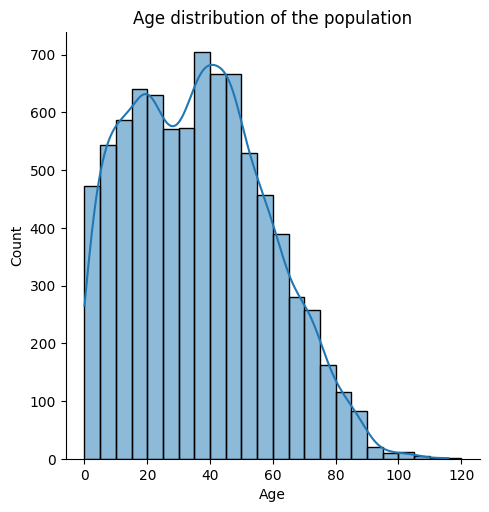

In [ ]:
# Create univariate plot for Age and set the axis labels
age_univar_displot= sns.displot(census_data["Age"], binwidth=5 , kde = True).set(title="Age distribution of the population")
age_univar_displot.set_axis_labels = ("Age", "Frequency")

In [ ]:
#Overview of the values in Age to determine how to group the Age class
print(sorted(census_data.Age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 112, 116]


### Age Pyramid

In [ ]:
#Group the ages into age bands of 5
age_bracket = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
age_boundary =['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69',
             '70-74','75-79','80-84','85-89','90-94','95-99','100-104','105-109','110-114','115-120']

#Add a new column "Age_Class" to the data frame
census_data['Age_Class'] = pd.cut(census_data['Age'], bins=age_bracket, labels=age_boundary, right = False)

#Convert to categorical : pd.Categorical
census_data["Age_Class"] = pd.Categorical(census_data["Age_Class"], categories=age_boundary, ordered=True)

# Print the first 5 rows to confirm the column has been successfully added
census_data.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category,Age_Class
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,Employed,40-44
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,Undecided,Student,10-14
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,Undecided,Student,5-9
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist,Employed,40-44
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic,Employed,35-39


In [ ]:
#Create the Female group for the Age pyramid
female_group = census_data[census_data["Gender"] == "Female"].groupby("Age_Class").size()
female_group = pd.Series(female_group)
female_list = female_group.tolist()
female_list_reversed = female_list[::-1]

#Create the Male group for the Age pyramid
male_group = census_data[census_data["Gender"] == "Male"].groupby("Age_Class").size()
male_group = male_group*-1
male_group = pd.Series(male_group)
male_list = male_group.tolist()
male_list_reversed = male_list[::-1]

#Confirm group range is successfully created.
print(female_list)
print("-" * 120)
print(male_list)

[239, 269, 294, 297, 322, 281, 309, 419, 371, 368, 285, 225, 193, 151, 147, 75, 61, 45, 10, 4, 5, 3, 0, 1]
------------------------------------------------------------------------------------------------------------------------
[-234, -275, -292, -344, -308, -291, -264, -285, -296, -298, -245, -232, -196, -129, -111, -87, -54, -38, -10, -6, -6, -1, -1, 0]


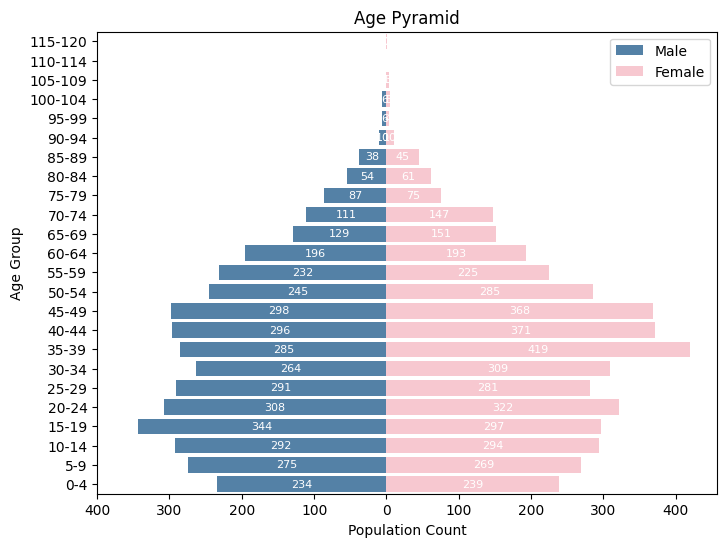

<Figure size 640x480 with 0 Axes>

In [ ]:
#Create a dataframe for the Age pyramid
pyramid_df = pd.DataFrame({ "Age" :age_boundary, "Male" :male_list, "Female" : female_list})


#Assign the class labels to age_category
age_category = age_boundary

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create the age pyramid plot
age_pyramid = sns.barplot(x='Male', y='Age', data=pyramid_df, order=age_category, color= 'steelblue', label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=pyramid_df, order=age_category, color='pink', label='Female')
age_pyramid.invert_yaxis()

#Add the respective age labels inside the pyramid for better visualisation
for band in age_pyramid.containers:
    for value in band:
        age_pyramid.text(value.get_width()/2 + value.get_x(), value.get_y()+value.get_height()/2, abs(int(value.get_width())),
                     ha="center", va="center", color="white",fontsize=8)

# Add labels and title
plt.title('Age Pyramid')
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.xticks([-400,-300,-200,-100,0,100,200,300,400],[400,300,200,100,0,100,200,300,400])

# Add legend
age_pyramid.legend()

# Show the plot
plt.show()

#Save the image
plt.savefig('age_pyramid.png')

In [ ]:
# Define a function to create barplot with percentages

def barplot_perc(data, feature, perc=False, n=None):

    # Indicate the length of the column
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

#Edit the labelling on the x-axis to be angled at 45 degrees
    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

#Include percentage in the bar plots to one decimal place
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total# percentage of bar in the plots
            )
        else:
            label = p.get_height()  # count of each bar

        x = p.get_x() + p.get_width() / 2  # width of the bins
        y = p.get_height()  # height of the bins

#add labelling and annotation size with the positioning
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

# show the visual
    plt.show()

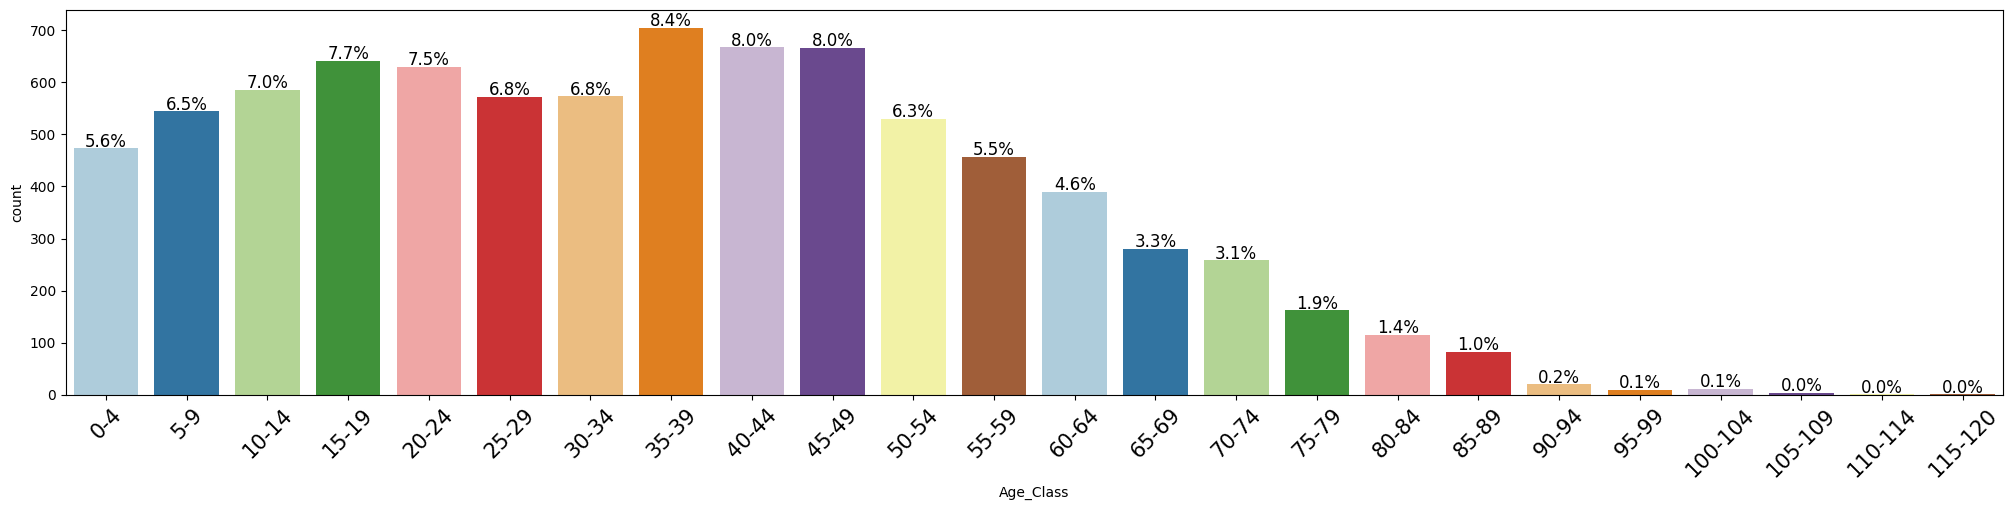

In [ ]:
#Age_Class distribution of the population
age_dist= barplot_perc(data = census_data, feature = "Age_Class", perc = True,)

Text(0.5, 1.0, 'Age Distribution by Gender')

<Figure size 1000x800 with 0 Axes>

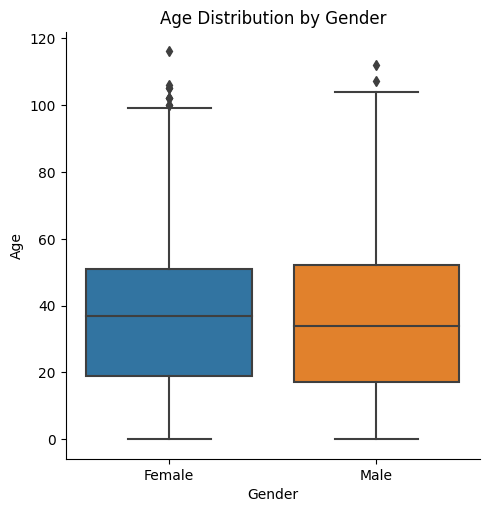

In [ ]:
#Plot of Age distribution by gender

#set the fig size
plt.figure(figsize = (10, 8));
sns.catplot(x = "Gender", y = "Age", data = census_data, kind = "box")
plt.title("Age Distribution by Gender") ##set the fig title

## Religion

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Catholic'),
  Text(1, 0, 'Undecided'),
  Text(2, 0, 'Methodist'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Christian'),
  Text(5, 0, 'Jewish'),
  Text(6, 0, 'Sikh'),
  Text(7, 0, 'Muslim'),
  Text(8, 0, 'Buddist')])

<Figure size 1000x800 with 0 Axes>

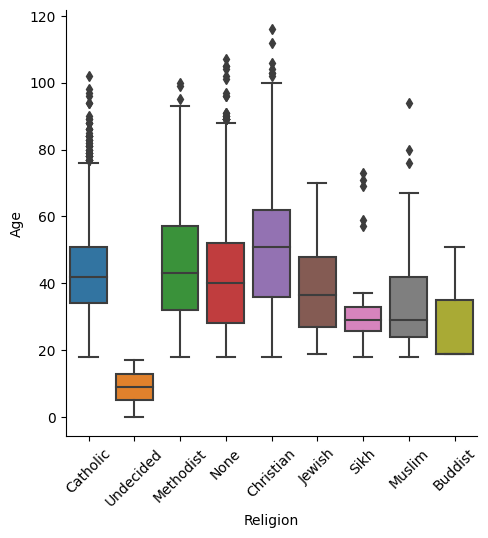

In [ ]:
#Box plot of Religion conditioned on Age
plt.figure(figsize = (10, 8));
sns.catplot(x = "Religion", y = "Age", data = census_data, kind = "box")
plt.xticks(rotation = 45)

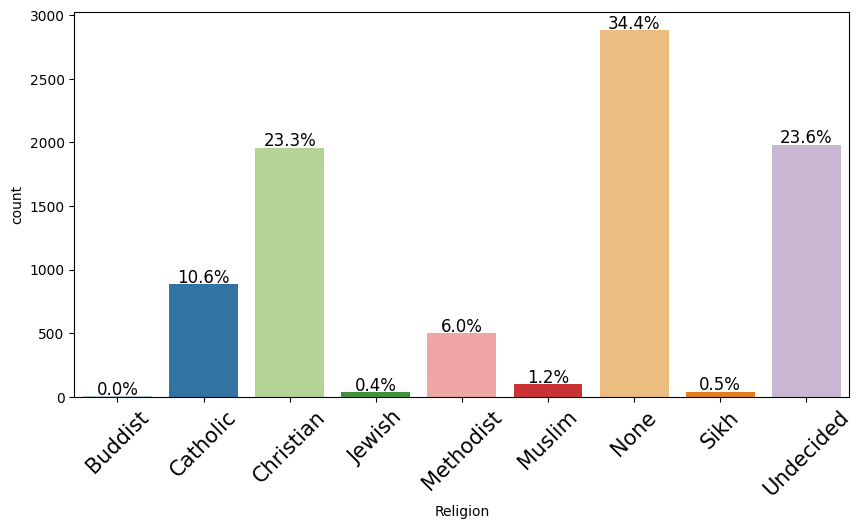

In [ ]:
#Plot of religious distribution
barplot_perc(data = census_data, feature = "Religion", perc = True)

In [ ]:
# Group data by religion and calculate median age for each group to determine growing or shrinking religions
religion_median_age = census_data.groupby('Religion')['Age'].median()

print(religion_median_age)

Religion
Buddist      19.0
Catholic     42.0
Christian    51.0
Jewish       36.5
Methodist    43.0
Muslim       29.0
None         40.0
Sikh         29.0
Undecided     9.0
Name: Age, dtype: float64


### Relationship to head of house

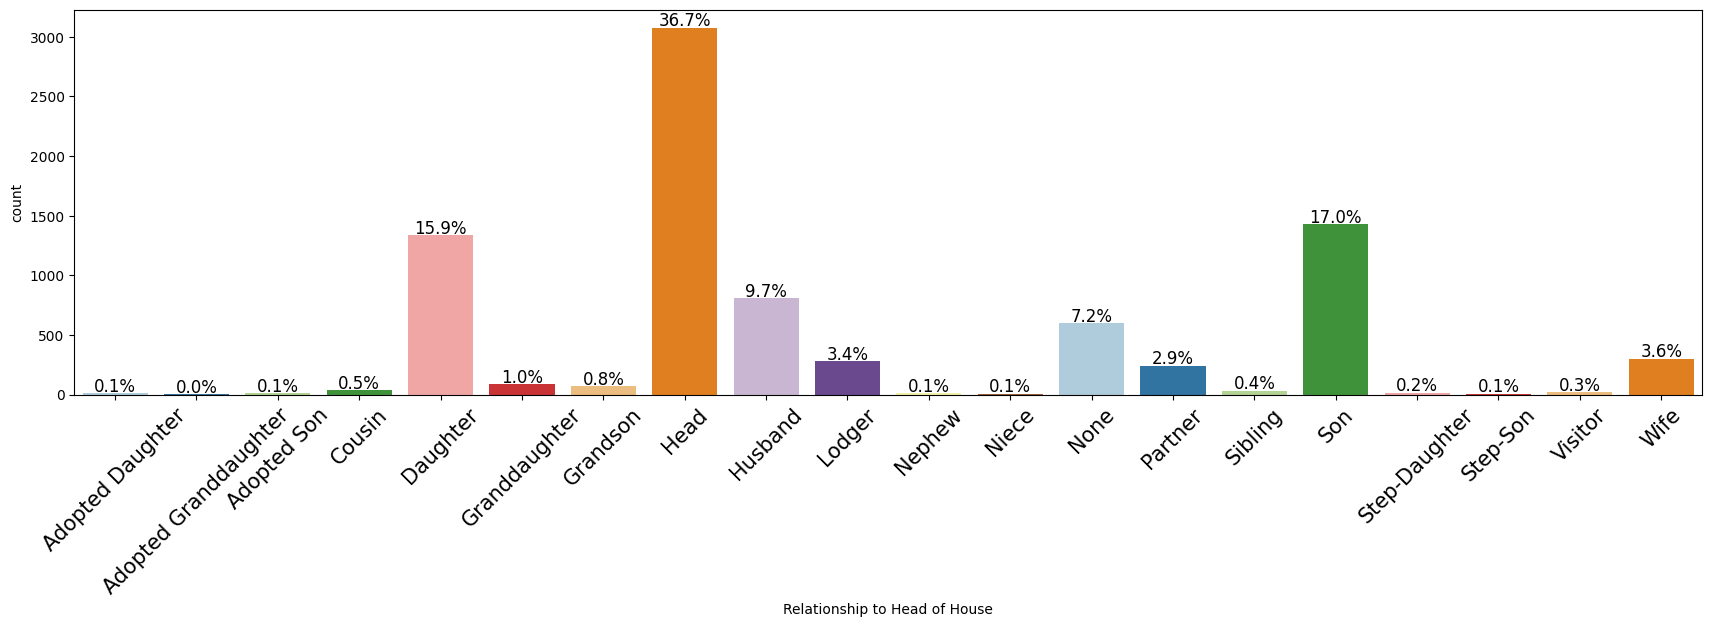

In [ ]:
#Relationshop to head of house distribution
barplot_perc(data = census_data, feature = "Relationship to Head of House", perc = True)

### Employment and Unemployment Trend Visualisation

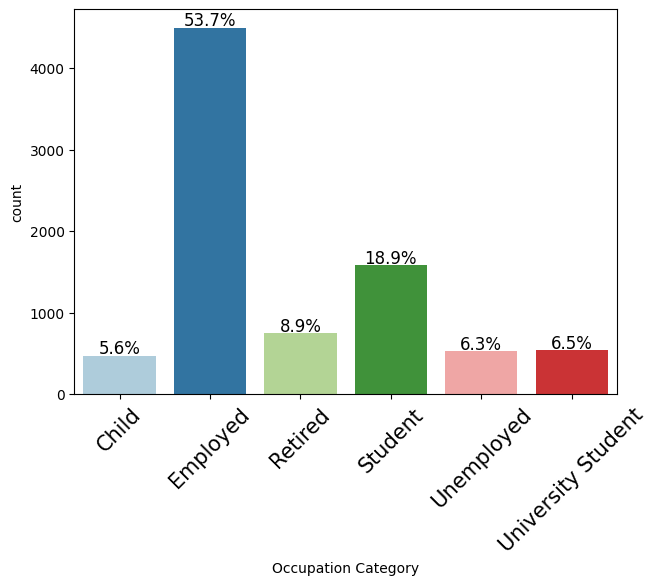

In [ ]:
#Plot of Occupation category
barplot_perc(data = census_data, feature = "Occupation Category", perc = True)

In [ ]:
#get total of the population
total_pop = len(census_data)
total_pop

8377

In [ ]:
#Get the set of people who are within working age and assign it to a variable
census_working_age = census_data[(census_data["Age"] >= 16) & (census_data["Age"] <= 64)]

In [ ]:
#Determine the number of people within working age and assign it to a variable
working_pop = census_working_age.shape[0]
working_pop

5682

In [ ]:
#Determine the number of people that are eligible to work by dividing the working population with the total population * 100
supposed_to_work = (working_pop/total_pop)*100
supposed_to_work

67.82857824997016

In [ ]:
#Determine the number of employed persons in the population and assign it to a variable named "employed"
employed =  census_working_age.loc[census_working_age["Occupation Category"] == "Employed"]['Age'].count()
employed

4348

In [ ]:
#employment rate = (Total employed population / Total working-age population) x 100
employment_rate = (employed/working_pop)*100
employment_rate

76.52235128475888

In [ ]:
#Determine the number of unemployed persons in the population and assign it to a variable named "unemployed"
unemployed = census_working_age.loc[census_working_age["Occupation Category"] == "Unemployed"]['Age'].count()
unemployed

484

In [ ]:
#unemployment rate = (Total unemployed population / Total working-age population) x 100
unemployment_rate = (unemployed/working_pop)*100
unemployment_rate

8.518127419922562

Unemployment rate is 8.5%. calculated using the official working age which is 16 to 64 years old individuals. from (gov.uk, 2023)

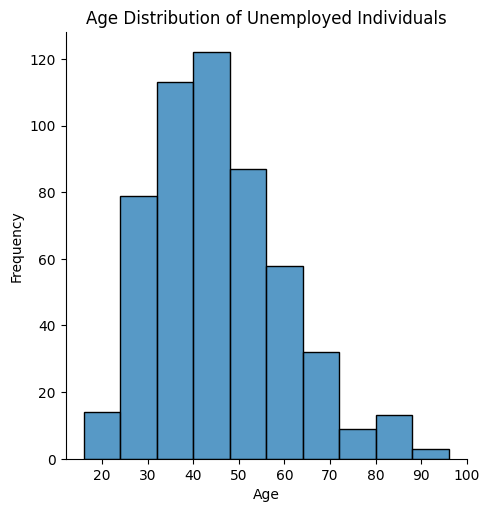

In [ ]:
# create a subset of the data for unemployed individuals
unemployed_df = census_data[census_data['Occupation Category'] == 'Unemployed']

# create a histogram of the ages of unemployed individuals
sns.displot(unemployed_df['Age'], bins=10)
plt.title('Age Distribution of Unemployed Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Check for median age of the unemployed population to confirm if they need employment traning
unemployed_df["Age"].median()

44.0

#### Time series trend of unemployment

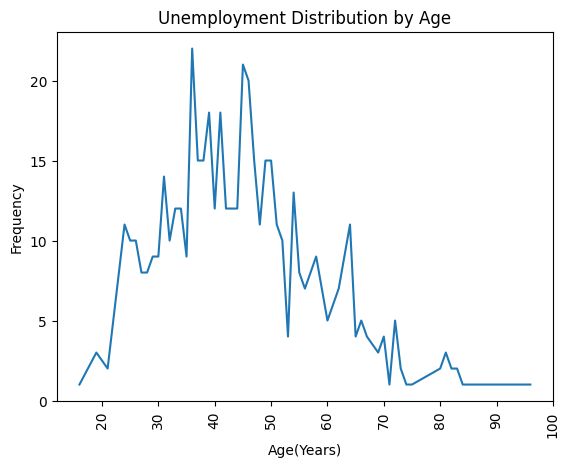

In [ ]:
# create a subset of the data for unemployed individuals for a time series trend of unemployment
unemployed_df = census_data[census_data['Occupation Category'] == 'Unemployed']


# count the number of unemployed individuals in each age group
age_counts_unemployed = unemployed_df['Age'].value_counts().sort_index()

# create a line plot of the age counts
plt.plot(age_counts_unemployed.index, age_counts_unemployed.values)
plt.title('Unemployment Distribution by Age')
plt.xlabel('Age(Years)')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

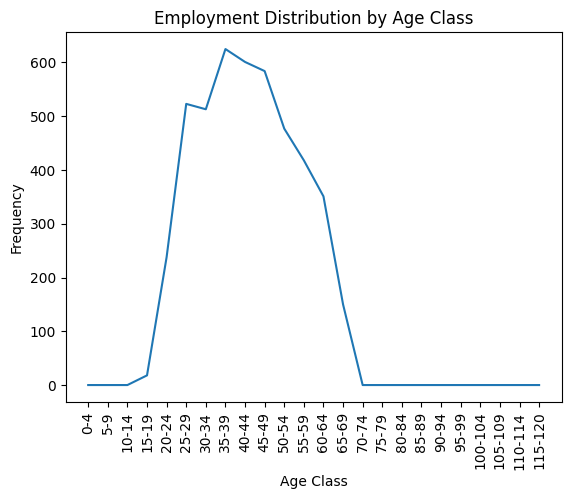

In [ ]:
# create a subset of the data for employed individuals
employed_df = census_data[census_data['Occupation Category'] == 'Employed']


# count the number of unemployed individuals in each age group
age_counts_employed = employed_df['Age_Class'].value_counts().sort_index()

# create a line plot of the age counts
plt.plot(age_counts_employed.index, age_counts_employed.values)
plt.title('Employment Distribution by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()


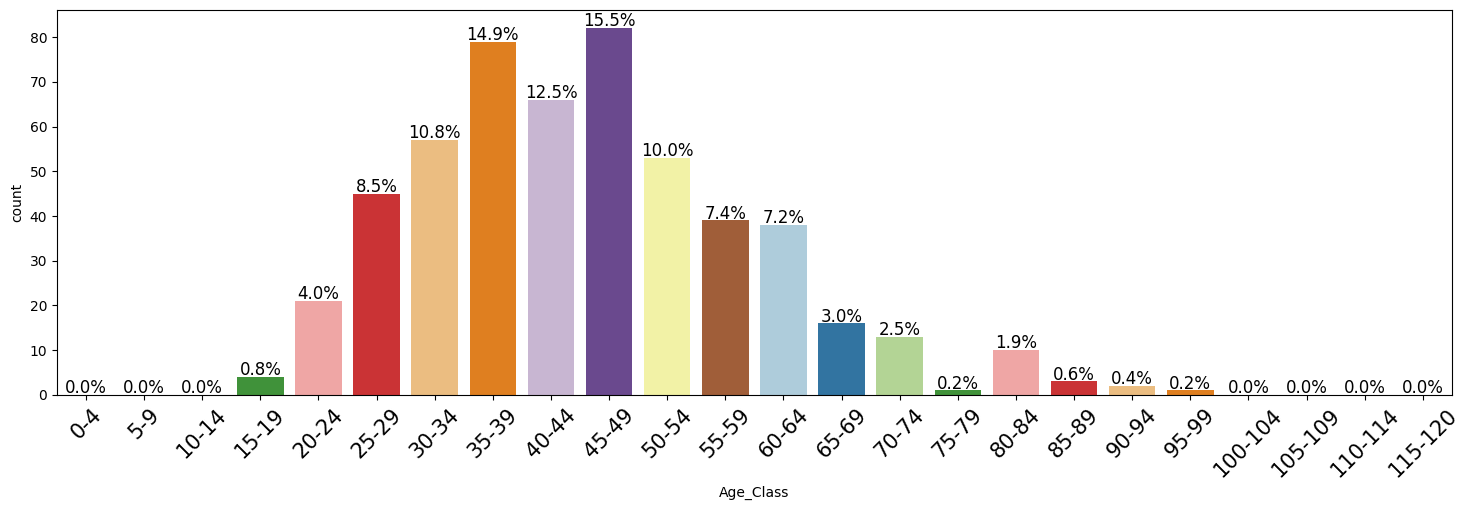

In [ ]:
unemployment_distribution= barplot_perc(data = unemployed_df, feature = "Age_Class", perc = True)

## Dependency Ratio

In [ ]:
#Gets the range of persons who depend on the working class for upkeep
dependents = census_data[(census_data["Age"] <= 15) | (census_data["Age"] >= 65)]
dependents

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category,Age_Class
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,Undecided,Student,10-14
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,Undecided,Student,5-9
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single,Female,Student,None,Undecided,Student,10-14
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single,Female,Child,None,Undecided,Child,0-4
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired Community education officer,None,None,Retired,75-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,1,Price Lodge,Ann,Lewis,73,Head,Widowed,Female,Unemployed,None,Christian,Unemployed,70-74
8369,1,Howard House,Tom,Bryant,13,Son,Single,Male,Student,None,Undecided,Student,10-14
8370,1,Howard House,Jean,Bryant,8,Daughter,Single,Female,Student,None,Undecided,Student,5-9
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single,Female,Child,None,Undecided,Child,0-4


In [ ]:
# Gets the total number of dependents
dependents_count = dependents.shape[0]
dependents_count

2695

In [ ]:
#Confirm the dependency ratio
dependency_ratio = (dependents_count/working_pop)*100
dependency_ratio

47.43048222456881

Total dependency rate of 47.4% shows that 47.4% of the population depend on the working class.

In [ ]:
#Determine the elderly dependency ratio
old_dependents= census_data[census_data["Age"] >= 65]
old_dependents

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category,Age_Class
15,5,Regentchain Avenue,Danielle,Dean,78,Head,Married,Female,Retired Community education officer,None,None,Retired,75-79
16,5,Regentchain Avenue,Robert,Dean,81,Husband,Married,Male,"Retired Doctor, hospital",None,None,Retired,80-84
29,8,Regentchain Avenue,Leon,Duncan,85,Head,Widowed,Male,Retired Surgeon,None,Christian,Retired,85-89
34,2,Telegraphnet Street,Leah,Taylor,90,Head,Married,Female,Retired Landscape architect,None,Catholic,Retired,90-94
35,2,Telegraphnet Street,Craig,Taylor,97,Husband,Married,Male,"Retired Engineer, civil (consulting)",None,Catholic,Retired,95-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,45,Arnold Ways,Bernard,James,66,Husband,Married,Male,Marine scientist,None,None,Employed,65-69
8241,47,Arnold Ways,Maurice,Hughes,80,Head,Divorced,Male,"Retired Therapist, sports",None,Christian,Retired,80-84
8248,52,Arnold Ways,Garry,Faulkner,73,Head,Widowed,Male,Retired Chartered loss adjuster,None,Christian,Retired,70-74
8271,1,Cook Keep,Sylvia,Wilson,66,Head,Married,Female,"Therapist, nutritional",None,None,Employed,65-69


In [ ]:
#Determine the number of people classified as old dependents.
old_dependents_count= len(old_dependents)
old_dependents_count

945

In [ ]:
#Get the set of people classified as young dependents and assign it to a variable
young_dependents= census_data[census_data["Age"] <= 15]
young_dependents

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category,Age_Class
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single,Female,Student,None,Undecided,Student,10-14
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single,Male,Student,None,Undecided,Student,5-9
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single,Female,Student,None,Undecided,Student,10-14
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single,Female,Child,None,Undecided,Child,0-4
27,7,Regentchain Avenue,Leon,Webster,12,Son,Single,Male,Student,None,Undecided,Student,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,1,Aries Spire,Jemma,Henderson,1,Daughter,Single,Female,Child,None,Undecided,Child,0-4
8369,1,Howard House,Tom,Bryant,13,Son,Single,Male,Student,None,Undecided,Student,10-14
8370,1,Howard House,Jean,Bryant,8,Daughter,Single,Female,Student,None,Undecided,Student,5-9
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single,Female,Child,None,Undecided,Child,0-4


In [ ]:
#Determine the number of people classified as young dependents.
young_dependents_count = len(young_dependents)
young_dependents_count

1750

In [ ]:
#Determine the ratio of young people to the working population
young_age_dependency_ratio = (young_dependents_count/working_pop)*100
young_age_dependency_ratio

30.79901443153819

In [ ]:
#Determine the old age dependency ratio by dividing the number of elderly dependents by the working population * 100
old_age_dependency_ratio = (old_dependents_count/working_pop)*100
old_age_dependency_ratio

16.631467793030623

In [ ]:
#Determine the total dependency ratio
old_age_dependency_ratio+young_age_dependency_ratio

47.43048222456881

### Marriage and divorce rates

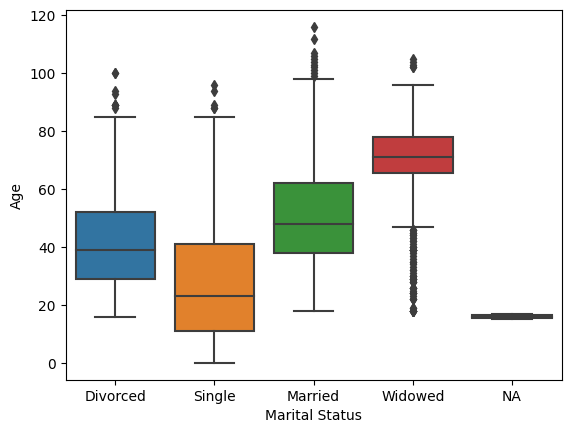

In [ ]:
#Box plot of Marital status conditioned oon Age
sns.boxplot(x="Marital Status", y = "Age", data = census_data);

In [ ]:
#Determine the married population and assign them to a variable
married_pop= census_data[census_data["Marital Status"] == "Married"]

In [ ]:
#Determine the married population and assign them to a variable
divorced_pop = census_data[census_data["Marital Status"] == "Divorced"]

In [ ]:
#Determine the number of people that are married
married_count = len(married_pop)
married_count

2222

In [ ]:
#Determine the number of people that are divorced
divorced_count = len(divorced_pop)
divorced_count

791

In [ ]:
#total population
total_count = len(census_data)
total_count

8377

In [ ]:
#Determine the number of unmarried people in the population including single, divorced and widowed.
unmarried_pop_count = len(
    census_data[(census_data["Marital Status"] == "Single") | (census_data["Marital Status"] == "Widowed") |
                (census_data["Marital Status"] == "Divorced")])
unmarried_pop_count

6153

In [ ]:
# number of marriages per 1,000 unmarried people in the population
marriage_rate = (married_count/unmarried_pop_count)*1000
marriage_rate

361.124654640013

In [ ]:
#the number of divorces per 1,000 married people in the population
divorce_rate = (divorced_count/married_count)*1000
divorce_rate

355.985598559856

In [ ]:
#Divorce to Marriage Ratio = (Divorce Rate / Marriage Rate) x 100
#there are .... divorced people for every 100  married people. interpret
divorce_marriage_ratio = (divorced_count/married_count)*100
divorce_marriage_ratio

35.5985598559856

### Commuters

In [ ]:
#Print an overview of the Occupations to determine what occupations to assign to potential commuters
sorted(census_data["Occupation"].unique())

['Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arboricul

In [ ]:
#Determines the potential commuters by filtering through the occupation list and removing retired persons fromo the search
potential_commuters = census_data.loc[
    census_data['Occupation'].str.contains(
        'Sales|Engineer|Lecturer|Architect|Surveyor|Cabin crew|Chief Executive Officer|Risk manager|Cytogeneticist|Financial|Insurance|Intelligence analyst|Interpreter|Advertising |Psychologist|Programmer|Optometrist|Network |Neurosurgeon|journalist|Radiographer|Aeronautical|Airline pilot|Animator|developer|Armed|Professor|Astronomer|Biomedical|Broadcast|Clinical|Dentist|Drilling|English|molecular|Geoscientist|Meteorologist|Oncologist|Scientist|Software'
    ) & ~census_data['Occupation'].str.contains('retired', case=False)
]
#print the number of potential commuters
len(potential_commuters)

962

In [ ]:
#Assigns the students commuting to university outside the town to a variabe
Commuting_University_Students= census_data.loc[census_data['Occupation Category'] == "University Student"]

In [ ]:
#Determines the total number of commuters
total_commuters = len(Commuting_University_Students)+len(potential_commuters)
total_commuters

1505

In [ ]:
#percentage of the population that are commuters
commuters_percentage= (total_commuters/total_pop)*100
print(f"The percentage of the population that are commuters is {commuters_percentage:.2f}%")

The percentage of the population that are commuters is 17.97%


### Marital Status

In [ ]:
#Fishes out the married minors previously assigned NA
minor_marriage = census_data[(census_data["Marital Status"] == "NA") & (census_data["Age"] < 18)]
minor_marriage

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category,Age_Class
4171,31,Chan Estate,Abigail,Begum,17,Head,NA,Female,Student,None,Undecided,Student,15-19
4919,11,Arrows Mission,Valerie,Smith,15,Head,NA,Female,Student,None,Undecided,Student,15-19


Text(0.5, 1.0, 'Population estimates (aged 18 and over) by marital status and gender')

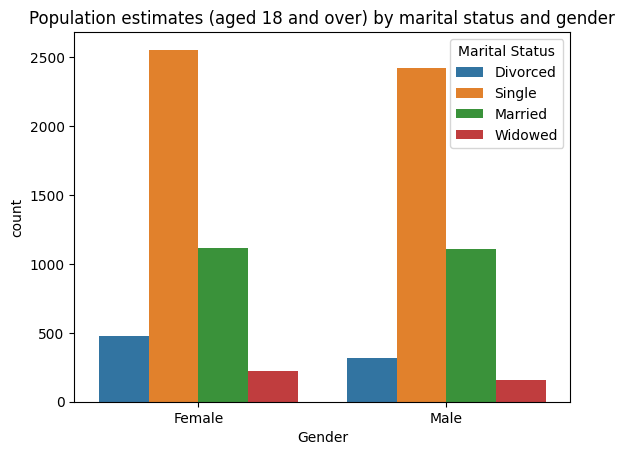

In [ ]:
# Filter out individuals who are minors and have NA marital status
census_minor_filtered = census_data[~((census_data["Marital Status"] == "NA") & (census_data["Age"] < 18))]

# Create the countplot using the filtered dataset
gender_marital_status = sns.countplot(data=census_minor_filtered, x="Gender", hue="Marital Status")

plt.title("Population estimates (aged 18 and over) by marital status and gender")

Text(0.5, 1.0, 'Population estimates (aged 18 and over) by marital status and gender')

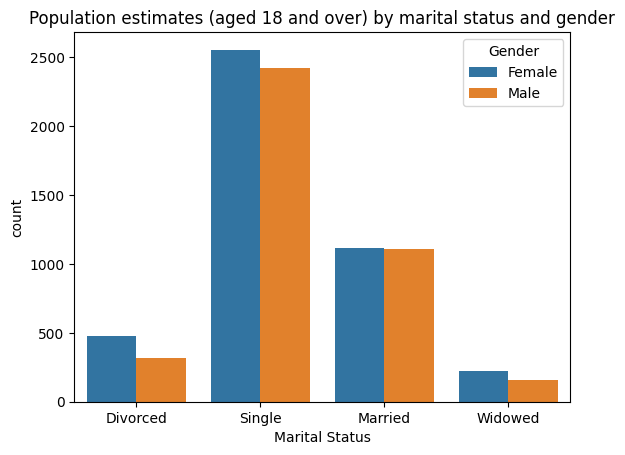

In [ ]:
# Filter out individuals who are minors and have NA marital status
census_minor_filtered = census_data[~((census_data["Marital Status"] == "NA") & (census_data["Age"] < 18))]

# Create the countplot using the filtered dataset
gender_marital_status = sns.countplot(data=census_minor_filtered, hue="Gender", x="Marital Status")

plt.title("Population estimates (aged 18 and over) by marital status and gender")

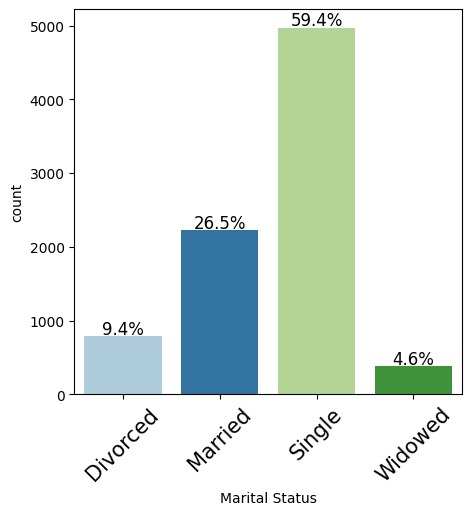

In [ ]:
#Plot of the Marital status distribution in the population
barplot_perc(data = census_minor_filtered, feature = "Marital Status", perc = True)

## Birth and death rate visualisation

#### Current Birth Rate

In [ ]:
#Compute the current birth rate of the population
current_infants = census_data[census_data["Age"].between(0, 1)]["Age"].count()

#obtain the number of women aged 15 to 45 which are women of child bearing age
current_reproductive_women = census_data[census_data["Age"].between(15, 45)]["Age"].count()

#Calculate the birth rate
current_birth_rate = round((current_infants/current_reproductive_women)*1000)

print(f"The number of current newborns is {current_infants}")
print(f"The current number of women within child bearing age is  {current_reproductive_women}")
print(f"The current birth rate per 1000 persons is {current_birth_rate}")

The number of current newborns is 173
The current number of women within child bearing age is  3920
The current birth rate per 1000 persons is 44


#### Evolving Age Specific Birth Rate

In [ ]:
#Compute the birth rate of the population 5 years ago
birth_five_years_ago = census_data[census_data["Age"].between(5, 6)]["Age"].count()

#obtain the number of women aged 20 to 50 which are women who birthed 5-6 year olds.
mothers_five_years_ago = census_data[census_data["Age"].between(20, 50)]["Age"].count()

#Calculate the birth rate
birth_rate_five_years_ago = round((birth_five_years_ago/mothers_five_years_ago)*1000)

print(f"The number of newborns five years ago was {birth_five_years_ago}")
print(f"The number of women within child bearing age five years ago was  {mothers_five_years_ago}")
print(f"The birth rate per 1000 persons five years ago  is {birth_rate_five_years_ago}")

The number of newborns five years ago was 204
The number of women within child bearing age five years ago was  3933
The birth rate per 1000 persons five years ago  is 52


In [ ]:
#Compute the birth rate of the population 10 years ago
birth_ten_years_ago = census_data[census_data["Age"].between(10, 11)]["Age"].count()

#obtain the number of women aged 25 to 55 which are women who birthed 10-11 year olds.
mothers_ten_years_ago = census_data[census_data["Age"].between(25, 55)]["Age"].count()

#Calculate the birth rate
birth_rate_ten_years_ago = round((birth_ten_years_ago/mothers_ten_years_ago)*1000)

print(f"The number of newborns 10 years ago was {birth_ten_years_ago}")
print(f"The number of women within child bearing age 10 years ago was {mothers_ten_years_ago}")
print(f"The birth rate per 1000 persons 10 years ago is {birth_rate_ten_years_ago}")

The number of newborns 10 years ago was 254
The number of women within child bearing age 10 years ago was 3813
The birth rate per 1000 persons 10 years ago is 67


In [ ]:
#Compute the birth rate of the population 15 years ago
birth_fifteen_years_ago = census_data[census_data["Age"].between(15, 16)]["Age"].count()

#obtain the number of women aged 30 to 60 which are women who birthed 15-16 year olds.
mothers_fifteen_years_ago = census_data[census_data["Age"].between(30, 60)]["Age"].count()

#Calculate the birth rate
birth_rate_fifteen_years_ago = round((birth_fifteen_years_ago/mothers_fifteen_years_ago)*1000)

print(f"The number of newborns 15 years ago was {birth_fifteen_years_ago}")
print(f"The number of women within child bearing age 15 years ago was {mothers_fifteen_years_ago}")
print(f"The birth rate per 1000 persons 15 years ago was {birth_rate_fifteen_years_ago}")

The number of newborns 15 years ago was 260
The number of women within child bearing age 15 years ago was 3696
The birth rate per 1000 persons 15 years ago was 70


In [ ]:
#Compute the birth rate of the population 20 years ago
birth_twenty_years_ago = census_data[census_data["Age"].between(20, 21)]["Age"].count()

#obtain the number of women aged 35 to 65 which are women who birthed 20-21 year olds.
mothers_twenty_years_ago = census_data[census_data["Age"].between(35, 65)]["Age"].count()

#Calculate the birth rate
birth_rate_twenty_years_ago = round((birth_twenty_years_ago/mothers_twenty_years_ago)*1000)

print(f"The number of newborns 20 years ago was {birth_twenty_years_ago}")
print(f"The number of women within child bearing age 20 years ago was {mothers_twenty_years_ago}")
print(f"The birth rate per 1000 persons 20 years ago was {birth_rate_twenty_years_ago}")

The number of newborns 20 years ago was 275
The number of women within child bearing age 20 years ago was 3461
The birth rate per 1000 persons 20 years ago was 79


In [ ]:
#Calculate the population of individuals for which birth rates were calculated
total_births = birth_rate_twenty_years_ago+birth_rate_fifteen_years_ago+birth_rate_ten_years_ago+birth_rate_five_years_ago+current_birth_rate
total_births

312

In [ ]:
total_reproductive_mothers= census_data[census_data["Age"].between(15, 45)]["Age"].count()
total_reproductive_mothers

3920

In [ ]:
#Calculate assumed total birth rate assuming that the population within these years are constant and NOT subject to change due to various factors such as births, deaths, migration etc.
Assumed_total_birth_rate = (total_births/total_reproductive_mothers)*1000
print (f"Assumed total birth rate (asssuming that the population is NOT subject to change due to various factors such as births, deaths, migration etc. is  {Assumed_total_birth_rate:.2f}")

Assumed total birth rate (asssuming that the population is NOT subject to change due to various factors such as births, deaths, migration etc. is  79.59


##### Create a dataframe to contain the variables

In [ ]:
#Create a dictionary to contain the age specific birth rates
birthrate_dict = {
    "Year": ["20 years ago", "15 years ago","10 years ago", "5 years ago", "Current year",],
    "Birth Rate":  [birth_rate_twenty_years_ago, birth_rate_fifteen_years_ago,birth_rate_ten_years_ago, birth_rate_five_years_ago, current_birth_rate]
}

#Create a pandas dataframe
birthrate_df = pd.DataFrame(birthrate_dict)
birthrate_df

,Year,Birth Rate
0,20 years ago,79
1,15 years ago,70
2,10 years ago,67
3,5 years ago,52
4,Current year,44


#### Crude Birth Rate

Text(0.5, 1.0, 'Age-Specific Birth Rates for 20 years')

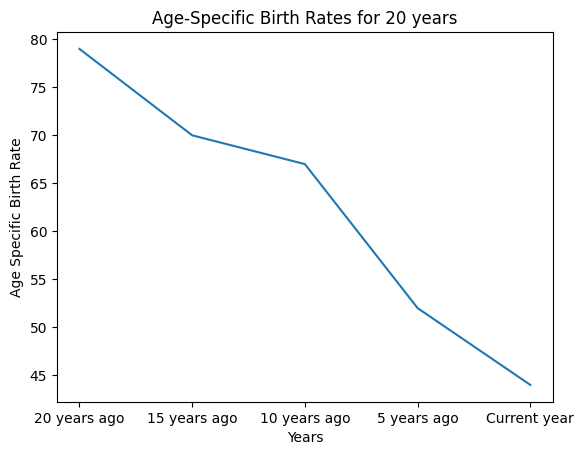

In [ ]:
# create a bar plot
plt.plot(birthrate_df["Year"],birthrate_df["Birth Rate"] )
plt.xlabel('Years')
plt.ylabel('Age Specific Birth Rate')
plt.title('Age-Specific Birth Rates for 20 years')

In [ ]:
# Calculate the current crude birth rate which is the number of births/ Total Population at the specific year *1000

current_crude_birth_rate = round((current_infants/total_pop)*1000)
print(f"The current crude birth rate is {current_crude_birth_rate}")

The current crude birth rate is 21


In [ ]:
#Crude birth rate 5 years ago

#Determine the children not born 5 years ago so they can be removed from the population
children_not_yet_born_5_years_ago = len(census_data.loc[census_data["Age"] <5])

#Calculate the population five years ago after removing children not yet born
population_five_years_ago= total_pop - children_not_yet_born_5_years_ago

#Calculate crude birth rate
CBR_five_years_ago = round((birth_five_years_ago/population_five_years_ago)*1000)


print(f"The number of unborn kids as at 5 years ago is {children_not_yet_born_5_years_ago}")
print(f"The population 5 years ago was {population_five_years_ago}")
print(f"The crude birth rate per 1000 persons 5 years ago was {CBR_five_years_ago}")

The number of unborn kids as at 5 years ago is 473
The population 5 years ago was 7904
The crude birth rate per 1000 persons 5 years ago was 26


In [ ]:
#Crude birth rate 10 years ago

#Determine the children not born 10 years ago so they can be removed from the population
children_not_yet_born_10_years_ago = len(census_data.loc[census_data["Age"] <10])

#Calculate the population 10 years ago after removing children not yet born
population_ten_years_ago= total_pop - children_not_yet_born_10_years_ago

#Calculate crude birth rate
CBR_ten_years_ago = round((birth_ten_years_ago/population_ten_years_ago)*1000)


print(f"The number of unborn kids as at 10 years ago is {children_not_yet_born_10_years_ago}")
print(f"The population 10 years ago was {population_ten_years_ago}")
print(f"The crude birth rate per 1000 persons 10 years ago was {CBR_ten_years_ago}")

The number of unborn kids as at 10 years ago is 1017
The population 10 years ago was 7360
The crude birth rate per 1000 persons 10 years ago was 35


In [ ]:
#Crude birth rate 15 years ago

#Determine the children not born 15 years ago so they can be removed from the population
children_not_yet_born_15_years_ago = len(census_data.loc[census_data["Age"] <15])

#Calculate the population 10 years ago after removing children not yet born
population_fifteen_years_ago= total_pop - children_not_yet_born_15_years_ago

#Calculate crude birth rate
CBR_fifteen_years_ago = round((birth_fifteen_years_ago/population_fifteen_years_ago)*1000)


print(f"The number of unborn kids as at 15 years ago is {children_not_yet_born_15_years_ago}")
print(f"The population 15 years ago was {population_fifteen_years_ago}")
print(f"The crude birth rate per 1000 persons 15 years ago was {CBR_fifteen_years_ago}")

The number of unborn kids as at 15 years ago is 1603
The population 15 years ago was 6774
The crude birth rate per 1000 persons 15 years ago was 38


In [ ]:
#Crude birth rate 20 years ago

#Determine the children not born 20 years ago so they can be removed from the population
children_not_yet_born_20_years_ago = len(census_data.loc[census_data["Age"] <20])

#Calculate the population 20 years ago after removing children not yet born
population_twenty_years_ago = total_pop - children_not_yet_born_20_years_ago

#Calculate crude birth rate
CBR_twenty_years_ago = round((birth_twenty_years_ago/population_twenty_years_ago)*1000)


print(f"The number of unborn kids as at 20 years ago is {children_not_yet_born_20_years_ago}")
print(f"The population 20 years ago was {population_twenty_years_ago}")
print(f"The crude birth rate per 1000 persons 20 years ago was {CBR_twenty_years_ago}")

The number of unborn kids as at 20 years ago is 2244
The population 20 years ago was 6133
The crude birth rate per 1000 persons 20 years ago was 45


In [ ]:
#Create a dictionary to contain the crude birth rates
CBR_dict = {
    "Year": ["20 years ago", "15 years ago","10 years ago", "5 years ago", "Current year",],
    "Birth Rate":  [CBR_twenty_years_ago, CBR_fifteen_years_ago, CBR_ten_years_ago, CBR_five_years_ago, current_crude_birth_rate]
}

#Create a pandas dataframe
CBR_df = pd.DataFrame(CBR_dict)
CBR_df

,Year,Birth Rate
0,20 years ago,45
1,15 years ago,38
2,10 years ago,35
3,5 years ago,26
4,Current year,21


Text(0.5, 1.0, 'Crude Birth Rates for 20 years')

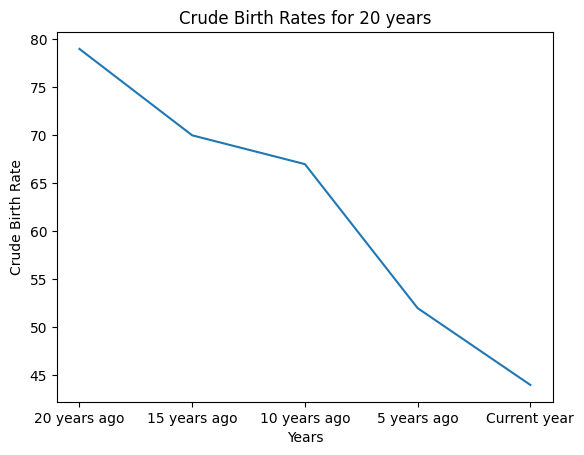

In [ ]:
# create a bar plot
plt.plot(birthrate_df["Year"],birthrate_df["Birth Rate"] )
plt.xlabel('Years')
plt.ylabel('Crude Birth Rate')
plt.title('Crude Birth Rates for 20 years')

### Death Rate

In [ ]:
#Population of people in the age range 45-49 vs 50-54
popn_Age_45_49 = census_data["Age"][(census_data ["Age"] >= 45) & (census_data ["Age"] <= 49)].count()
popn_Age_50_54 = census_data["Age"][(census_data ["Age"] >= 50) & (census_data ["Age"] <= 54)].count()
first_death_rate = (popn_Age_45_49 - popn_Age_50_54) / 5
print(f"Deaths between the range 45-49 vs 50-54 is {first_death_rate:.0f}")

#Population of people in the age range 55-59 vs 60-64
popn_Age_55_59 = census_data["Age"][(census_data ["Age"] >= 55) & (census_data ["Age"] <= 59)].count()
popn_Age_60_64 = census_data["Age"][(census_data ["Age"] >= 60) & (census_data ["Age"] <= 64)].count()
second_death_rate = (popn_Age_55_59 - popn_Age_60_64) / 5
print(f"Deaths between the range 55-59 vs 60-64 is {second_death_rate:.0f}")

#Population of people per age range 65-79 vs 70-74
popn_Age_65_69 = census_data["Age"] [(census_data ["Age"] >= 65) & (census_data ["Age"] <= 69)].count()
popn_Age_70_74 = census_data["Age"][(census_data ["Age"] >= 70) & (census_data ["Age"] <= 74)].count()
third_death_rate = (popn_Age_65_69 - popn_Age_70_74) / 5
print (f"Deaths between the range 65-79 vs 70-74 is {third_death_rate:.0f}")

#Population of people per age range 75-79 vs 80-84
popn_Age_75_79 = census_data["Age"][(census_data  ["Age"] >= 75) & (census_data ["Age"] <= 79)].count()
popn_Age_80_84 = census_data["Age"][(census_data ["Age"] >= 80) & (census_data ["Age"] <= 84)].count()
fourth_death_rate = (popn_Age_75_79 - popn_Age_80_84) / 5
print (f"Deaths between the range 75-79 vs 80-84 is {fourth_death_rate:.0f}")

#Population of people per age range 85-89 vs 90-94
popn_Age_85_89 = census_data["Age"][(census_data ["Age"] >= 85) & (census_data ["Age"] <= 89)].count()
popn_Age_90_94 = census_data[ "Age"] [(census_data ["Age"] >= 90) & (census_data ["Age"] <= 94)].count()
fifth_death_rate = (popn_Age_85_89 - popn_Age_90_94) / 5
print (f"Deaths between the range 85-89 vs 90-94 is {fifth_death_rate :.0f}")

#Population of people per age range 95-99 vs 100-104
popn_Age_95_99 = census_data ["Age"][(census_data ["Age"] >= 95) & (census_data ["Age"] <= 99)].count()
popn_Age_100_104 = census_data ["Age"][(census_data ["Age"] >= 100) & (census_data ["Age"] <= 104)].count()
sixth_death_rate = (popn_Age_95_99 - popn_Age_100_104) / 5
print (f"Deaths between the range 95-99 vs 100-104  is {sixth_death_rate:.2f}")

#Population of people per age range 105-109 vs 110-max age
popn_Age_105_109 = census_data ["Age"][(census_data ["Age"] >= 105) & (census_data ["Age"] <= 109)].count()
popn_Age_110_max = census_data ["Age"][(census_data ["Age"] >= 110) & (census_data ["Age"] <= 116)].count()
seventh_death_rate = (popn_Age_105_109 - popn_Age_110_max) / 5
print (f"Deaths between the range 105-109 vs 110-max age is {seventh_death_rate:.2f}")


Total_deaths = (first_death_rate + second_death_rate + third_death_rate + fourth_death_rate + fifth_death_rate + sixth_death_rate + seventh_death_rate)
print (f"Total deaths is {Total_deaths:.2f}")

Deaths between the range 45-49 vs 50-54 is 27
Deaths between the range 55-59 vs 60-64 is 14
Deaths between the range 65-79 vs 70-74 is 4
Deaths between the range 75-79 vs 80-84 is 9
Deaths between the range 85-89 vs 90-94 is 13
Deaths between the range 95-99 vs 100-104  is -0.20
Deaths between the range 105-109 vs 110-max age is 0.40
Total deaths is 67.40


In [ ]:
#Calculate the population of individuals for which death rates were calculated
Death_age_popn = census_data ["Age"].between(45,116).sum()
Death_age_popn

2987

In [ ]:
#Calculate assumed total death rate assuming that the population within these years are constant and NOT subject to change due to various factors such as births, deaths, migration etc.
Assumed_total_death_rate = (Total_deaths/Death_age_popn)*1000
print (f"Assumed total death rate is (asssuming that the population is NOT subject to change due to various factors such as births, deaths, migration etc. is  {Assumed_total_death_rate:.0f}")

Assumed total death rate is (asssuming that the population is NOT subject to change due to various factors such as births, deaths, migration etc. is  23


Text(0.5, 1.0, 'Death Rates for Select\xa0Age\xa0Groups')

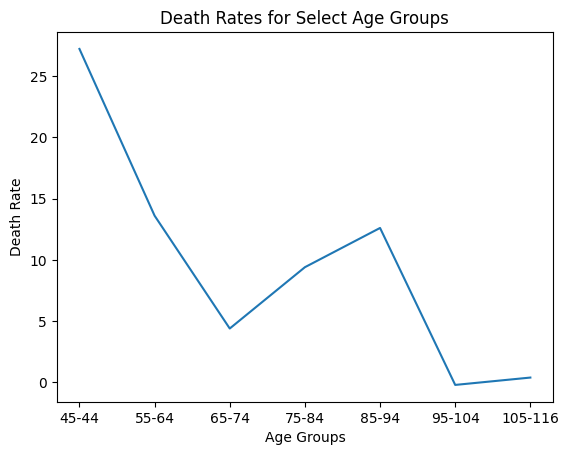

In [ ]:
# create a list of death rates
death_rates= [first_death_rate, second_death_rate , third_death_rate , fourth_death_rate , fifth_death_rate , sixth_death_rate , seventh_death_rate]
#print(death_rates)

# create a bar plot
plt.plot(['45-44','55-64', '65-74', '75-84', '85-94', '95-104', '105-116'], death_rates)
plt.xlabel('Age Groups')
plt.ylabel('Death Rate')
plt.title('Death Rates for Select Age Groups')

In [ ]:
#Calculate the birth-death rate difference to determine if the population is growing or shrinking.
birth_death_rate_difference = Assumed_total_birth_rate - Assumed_total_death_rate
(round(birth_death_rate_difference))

57

### Immigration Rate

In [ ]:
#Calculate the number of immigrants by accounting for lodgers, visitors and university students.

immigrants = census_data[(census_data["Relationship to Head of House"] == "Lodger") | (census_data["Relationship to Head of House"] == "Visitor")|(census_data["Occupation"] == "University Student")]
immigrants_count = len(immigrants)
immigrants_count

808

In [ ]:
#calculate the immigration rate by dividingthe immgrant count by the total population * 100
immigration_rate = ((immigrants_count/ total_pop) *1000)
print(f'The immigration rate per 1000 persons is {immigration_rate:.0f}')

The immigration rate per 1000 persons is 96


In [ ]:
#Occupation held by lodgers and visitors confirm that they are possibly immigrants that commute to work from the town
immigrants["Occupation"].unique()

array(['University Student', 'Set designer', 'Holiday representative',
       'Scientist, physiological', 'Forensic psychologist',
       'Surveyor, hydrographic', 'Tourism officer',
       'Programme researcher, broadcasting/film/video',
       'Chartered public finance accountant', 'Data scientist',
       'Cabin crew', 'Software engineer',
       'Armed forces technical officer', 'Dancer',
       'English as a second language teacher', 'Tour manager',
       'Field seismologist', 'Unemployed',
       'Accountant, chartered certified', 'Research scientist (maths)',
       'Heritage manager', 'Social research officer, government',
       'Database administrator', 'Health and safety adviser',
       'Programmer, systems', 'Public house manager', 'Barrister',
       'Health promotion specialist', 'Psychologist, sport and exercise',
       'Health and safety inspector', 'Professor Emeritus',
       'Financial manager', 'Multimedia programmer', 'Engineer, drilling',
       'Health service

### Emmigration rate

Text(0.5, 1.0, 'Distribution of divorcees')

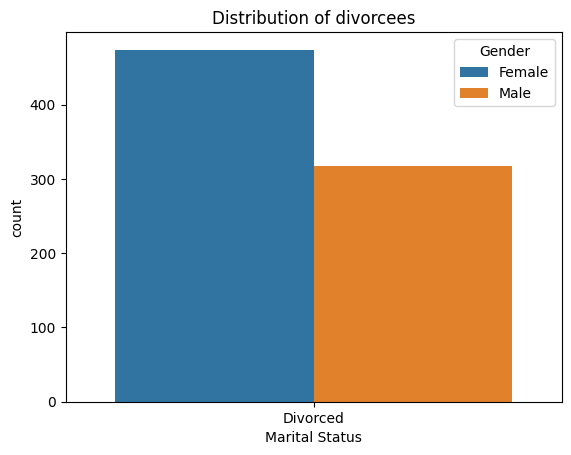

In [ ]:
# Create a plot of distribution of divorcees using the dataset filtered on Marital Status
divorced_marital_status = sns.countplot(
    data= census_data[census_data["Marital Status"] == "Divorced"], hue="Gender", x="Marital Status")

plt.title("Distribution of divorcees") #Add title to the plot

In [ ]:
#Emmigrants are divorcees that left the town over the course of one year ie male divorcees

divorced_males = census_data[(census_data["Marital Status"] == "Divorced") & (census_data["Gender"] == "Male")]
divorced_females = census_data[(census_data["Marital Status"] == "Divorced") & (census_data["Gender"] == "Female")]

divorced_males_count = len(divorced_males)
divorced_females_count = len(divorced_females)

# Calculating Emmigrants due to Divorce
print(f" Number of divorced males : {divorced_males_count}")
print(f" Number of divorce females : {divorced_females_count}")

#Difference of female and male divorcees
divorced_emmigrants_count = (divorced_females_count - divorced_males_count)

print(f' The divorcees that left town over the course of one year are {divorced_emmigrants_count} in number')

 Number of divorced males : 317
 Number of divorce females : 474
 The divorcees that left town over the course of one year are 157 in number


In [ ]:
#Calculate the emigration rate by dividing the emigrant count by the total pupulation * 100
emmigration_rate = ((divorced_emmigrants_count/total_pop)*1000)
print(f'The emmigration rate is {emmigration_rate:.0f}')

The emmigration rate is 19


For every 1000 people 19 people leave the town

In [ ]:
#Checks for whether the population is growing or shrinking.
growing_pop = Assumed_total_birth_rate + immigration_rate
shrinking_pop = Assumed_total_death_rate + emmigration_rate
round(growing_pop)

176

In [ ]:
round(shrinking_pop)

41

For every 1000 persons, for 176 persons that are added to the population through immigration and birth, 41 people are leaving through emmigration and death. This shows that the population is growing.

### Occupancy level

In [ ]:
#Calculates the number of houses in the town
house_count = census_data.groupby(['House Number', 'Street']).size().reset_index(name= 'People_Per_House')
house_count

,House Number,Street,People_Per_House
0,1,Aethelred Crescent,1
1,1,Aethelred Heights,4
2,1,Ahmed Spur,1
3,1,Anvilgain Road,1
4,1,Aries Spire,13
...,...,...,...
3059,193,Harvey Road,1
3060,194,Harvey Road,1
3061,195,Harvey Road,1
3062,196,Harvey Road,1


In [ ]:
#calculate the average occupancy level by dividing the total number of people in all houses by the total number of houses
avg_occupancy_rate = total_pop / len(house_count)
print(f'The average occupancy rate is {round(avg_occupancy_rate)}')

The average occupancy rate is 3


In [ ]:
#This will add a new column 'Occupancy_Grading' to the 'house_counts' dataframe
#This will indicate whether each house is being under-used, over-used or is optimal.

house_count.loc[house_count["People_Per_House"] == 3, "Occupancy_Grading"] = "Optimal"
house_count.loc[house_count["People_Per_House"] > 3, "Occupancy_Grading"] = "Over-used"
house_count.loc[house_count["People_Per_House"] < 3, "Occupancy_Grading"] = "Under-used"
house_count

,House Number,Street,People_Per_House,Occupancy_Grading
0,1,Aethelred Crescent,1,Under-used
1,1,Aethelred Heights,4,Over-used
2,1,Ahmed Spur,1,Under-used
3,1,Anvilgain Road,1,Under-used
4,1,Aries Spire,13,Over-used
...,...,...,...,...
3059,193,Harvey Road,1,Under-used
3060,194,Harvey Road,1,Under-used
3061,195,Harvey Road,1,Under-used
3062,196,Harvey Road,1,Under-used


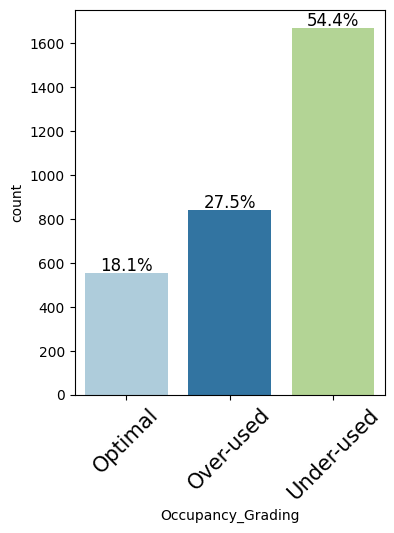

In [ ]:
#Create a plot of the occupancy level to see the rates of occupancy in the town.
barplot_perc(data = house_count, feature = "Occupancy_Grading", perc = True)